Classification  
from Note   
1. 引入資料集  
2. 找出資料特徵 & 關聯係數
3. 將資料分組 (實驗組 & 對照組)  
4. 做成決策樹 & 訓練模型
5. 繪出決策樹
6. 帶入對照組資料，預測
7. 正確率 (accuracy_score)
8. 剖析正確率 (混淆矩陣)

In [157]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# 引入資料集
iris = load_iris()

# 做成df
x = pd.DataFrame(iris["data"], columns=iris["feature_names"])
y = pd.DataFrame(iris["target"])

# 轉array
xarray = np.array(x)
yarray = np.array(y)
iris


150

In [133]:
from sklearn.model_selection import train_test_split

# 分割資料
x_train, x_test, y_train, y_test = train_test_split(xarray, yarray, test_size=0.1)

In [134]:
from sklearn.tree import DecisionTreeClassifier

# 做成決策樹
clf = DecisionTreeClassifier(max_depth=3)

# 導入訓練資料
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [44, 44, 47]\nclass = virginica'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal length (cm) <= 4.85\ngini = 0.499\nsamples = 91\nvalue = [0, 44, 47]\nclass = virginica'),
 Text(0.25, 0.375, 'petal width (cm) <= 1.65\ngini = 0.089\nsamples = 43\nvalue = [0, 41, 2]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.75, 0.375, 'petal width (cm) <= 1.75\ngini = 0.117\nsamples = 48\nvalue = [0, 3, 45]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.49\nsamples = 7\nvalue = [0, 3, 4]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]\nclass = virginica')]

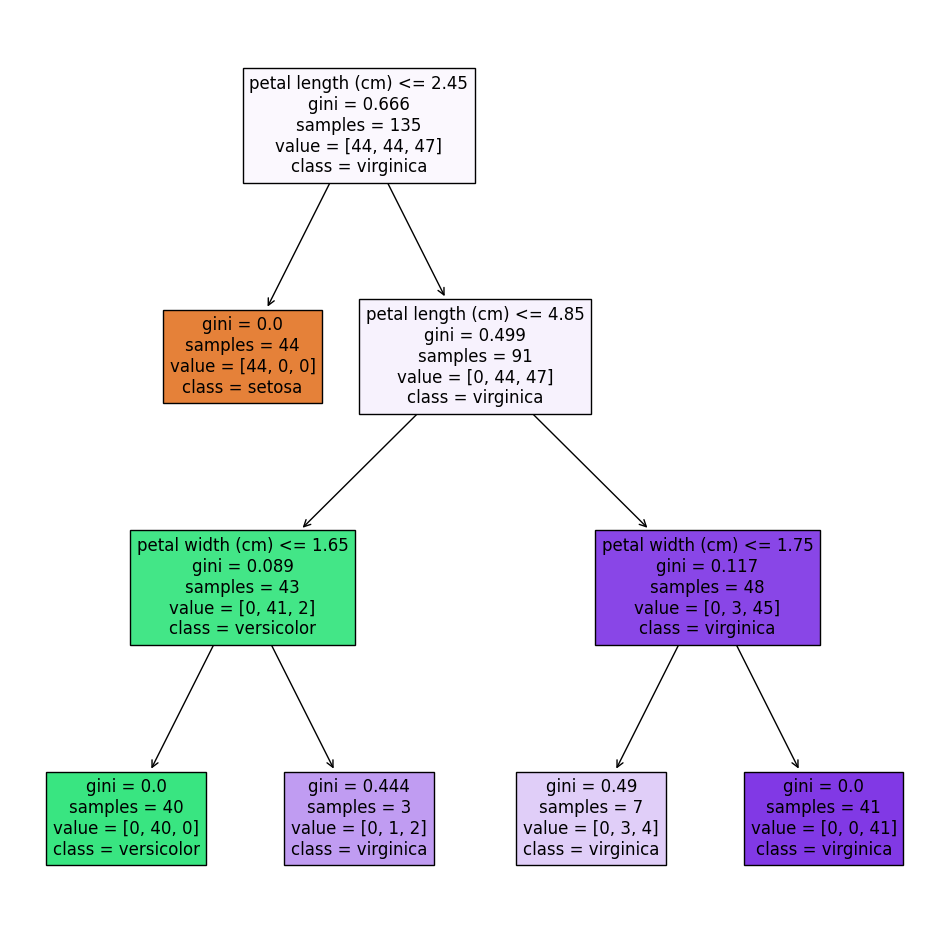

In [135]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 畫圖
plt.figure(figsize=(12,12))
# 特徵名稱, 分類類別, 圖框是否上色
plot_tree(clf, feature_names=iris["feature_names"], class_names=iris["target_names"], filled=True)

In [136]:
from sklearn.metrics import accuracy_score

# 帶入答案，檢視模型合理性
pre = clf.predict(x_test)

# 做出test檔案的df + 預測值 -> 進一步檢視
testsample = pd.DataFrame(x_test, columns=iris["feature_names"])
testans = pd.DataFrame(y_test, columns=["target"])
testpre = pd.DataFrame(pre, columns=["predicted_target"])
test_total = pd.concat([testsample, testans, testpre], axis=1)

score = accuracy_score(y_test, pre)
print(f"精準度: {score}")

test_total

精準度: 0.9333333333333333


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predicted_target
0,5.0,3.4,1.6,0.4,0,0
1,5.7,3.0,4.2,1.2,1,1
2,7.0,3.2,4.7,1.4,1,1
3,5.5,2.4,3.8,1.1,1,1
4,6.1,2.9,4.7,1.4,1,1
5,5.4,3.4,1.5,0.4,0,0
6,6.7,3.1,4.4,1.4,1,1
7,5.1,3.3,1.7,0.5,0,0
8,6.2,2.8,4.8,1.8,2,2
9,4.6,3.2,1.4,0.2,0,0


Regression  
from note  
1. 引入資料集  
2. 將資料分組 (實驗組 & 對照組)  
3. 做成決策樹 & 訓練模型
4. 繪出決策樹
5. 帶入對照組資料，預測
6. 正確率 (R2_score)
7. 剖析正確率 (混淆矩陣)

In [137]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np

# 此為tsv檔案
df = pd.read_csv(r"D:\Learn\Machine_Learn\_sklearn_diabetes.csv", encoding="utf-8", sep="\t")

# 做成df
x = df.drop(["Y"], axis=1)
y = df["Y"]

# 轉array
xarray = np.array(x)
yarray = np.array(y)
x

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [138]:
from sklearn.model_selection import train_test_split

# 分割資料
x_train, x_test, y_train, y_test = train_test_split(xarray, yarray, test_size=0.1)

In [139]:
from sklearn.tree import DecisionTreeRegressor

# 做成決策樹
reg = DecisionTreeRegressor(max_depth=2)

# 導入訓練資料
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'S5 <= 4.6\nsquared_error = 5912.401\nsamples = 397\nvalue = 152.524'),
 Text(0.25, 0.5, 'BMI <= 27.25\nsquared_error = 3192.439\nsamples = 198\nvalue = 109.975'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2216.001\nsamples = 158\nvalue = 97.715'),
 Text(0.375, 0.16666666666666666, 'squared_error = 4110.69\nsamples = 40\nvalue = 158.4'),
 Text(0.75, 0.5, 'BMI <= 31.55\nsquared_error = 5025.076\nsamples = 199\nvalue = 194.859'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4414.305\nsamples = 158\nvalue = 179.589'),
 Text(0.875, 0.16666666666666666, 'squared_error = 3017.036\nsamples = 41\nvalue = 253.707')]

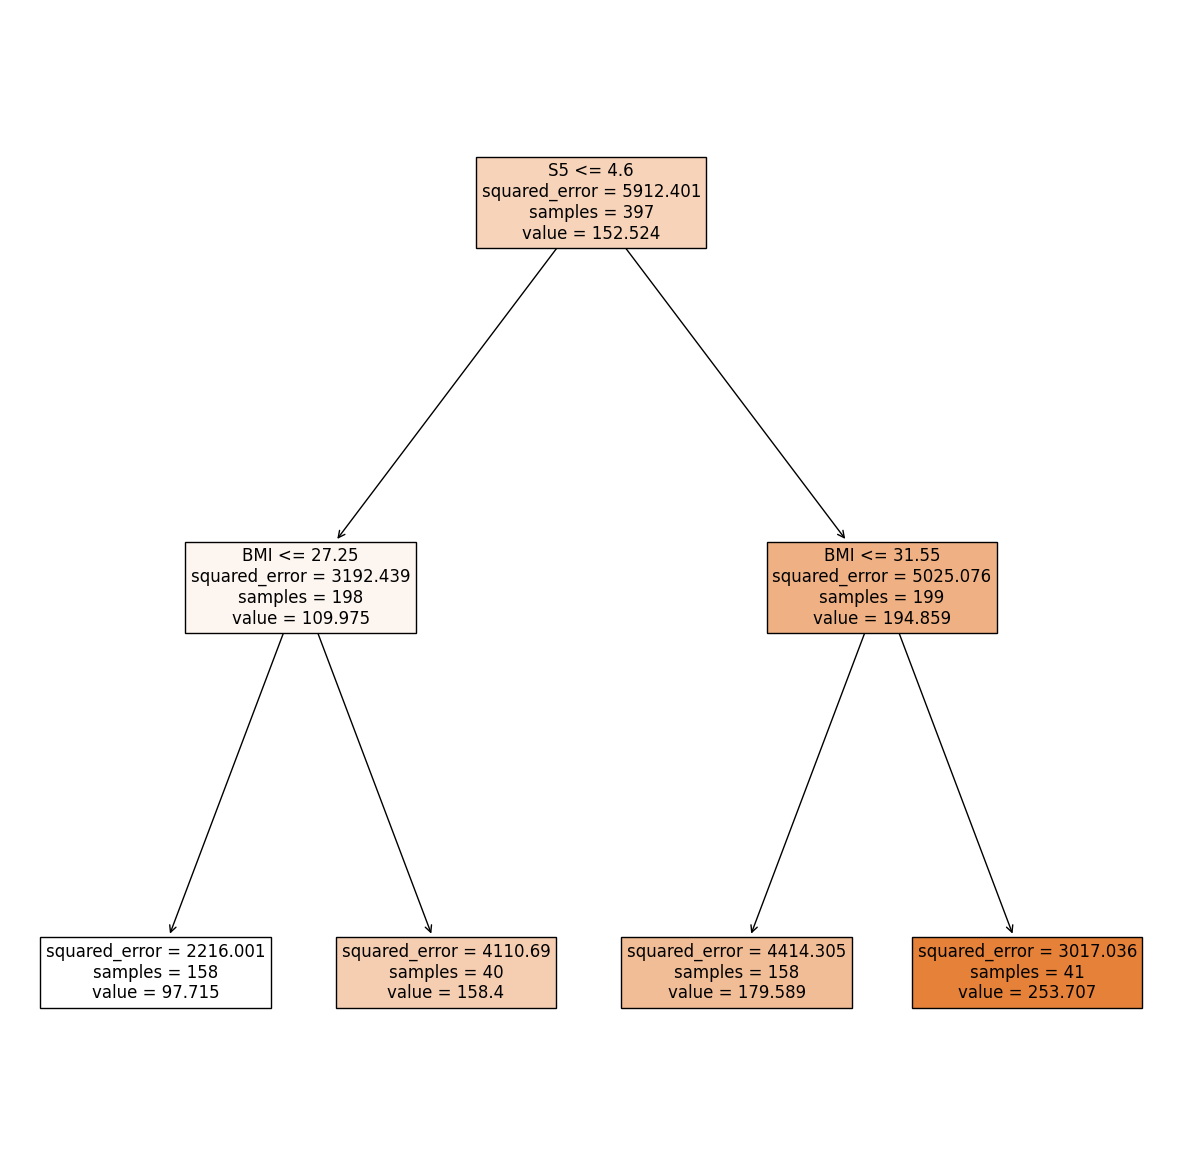

In [140]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 畫圖
plt.figure(figsize=(15,15))
plot_tree(reg, feature_names=x.columns, filled=True, fontsize=12)

In [141]:
from sklearn.metrics import r2_score

# 帶入答案，檢視模型合理性
pre = reg.predict(x_test)
score = r2_score(y_test, pre)

# 做出test檔案的df + 預測值 -> 進一步檢視
testsample1 = pd.DataFrame(x_test, columns=x.columns)
testans1 = pd.DataFrame(y_test, columns=["target_Y"])
testpre1 = pd.DataFrame(pre, columns=["predicted_target_Y"])

test_total1 = pd.concat([testsample1, testans1, testpre1], axis=1)

print(f"預測準確度: {score}")
test_total1

預測準確度: 0.37934184413158334


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,target_Y,predicted_target_Y
0,57.0,1.0,24.5,93.00,186.0,96.6,71.0,3.00,4.5218,91.0,148,97.715190
1,44.0,1.0,25.4,95.00,162.0,92.6,53.0,3.00,4.4067,83.0,25,97.715190
2,37.0,2.0,27.7,93.00,180.0,119.4,30.0,6.00,5.0304,88.0,142,179.588608
3,23.0,1.0,18.8,78.00,145.0,72.0,63.0,2.00,3.9120,86.0,85,97.715190
4,41.0,2.0,32.0,109.00,251.0,170.6,49.0,5.00,5.0562,103.0,186,253.707317
5,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135,97.715190
6,42.0,1.0,29.2,93.00,249.0,174.2,45.0,6.00,5.0039,92.0,122,179.588608
7,61.0,1.0,33.0,95.00,182.0,114.8,54.0,3.00,4.1897,74.0,141,158.400000
8,42.0,1.0,19.9,76.00,146.0,83.2,55.0,3.00,3.6636,79.0,63,97.715190
9,63.0,1.0,26.0,85.67,155.0,78.2,46.0,3.37,5.0370,97.0,198,179.588608


Cluster  
from note  
1. 引入資料集 & 整理資料
2. 將資料分組 (實驗組 & 對照組)  
3. 尋找K值 -> 畫分群圖 (K means)
4. 可畫圖找K值
5. 計算K值的正確率 (silhouette_score)

In [151]:
# 重新導入iris 假設不知道分類
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()

# 做成df
x = pd.DataFrame(iris["data"], columns=iris["feature_names"])
y = pd.DataFrame(iris["target"], columns=["target"])
df = pd.concat([x,y], axis=1)

# 轉array
xarray = np.array(x)
yarray = np.array(y)

In [143]:
# 分資料
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xarray, yarray, test_size=0.1)

In [158]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 先自己假設分3群
clu = KMeans(n_clusters=3)

# 帶入訓練資料
clu.fit(x_train)

# 對train的資料貼標籤
clu.labels_

# 計算準確度分數
silhouette_score(x_train, clu.labels_)


c:\Users\李重誼\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5635314913598888

Cluster  
1. 資料中並沒有答案
2. 所以計算出最適合的KMeans時，我們可以自己對labels分出來的資料命名 clusterA, clusterB ...
3. 所以沒有正確答案與否的問題
4. silhouette_score 也並非正確率分數 而是各個資料相聚程度的分數

In [167]:
for how_many_cluster in range(2,21):
    clu = KMeans(n_clusters=how_many_cluster, n_init="auto")
    clu.fit(x_train)
    gather_score = silhouette_score(x_train, clu.labels_)
    print(f"分成 {how_many_cluster} 群時，資料聚合分數為:{gather_score}")

分成 2 群時，資料聚合分數為:0.6901592465811192
分成 3 群時，資料聚合分數為:0.5635314913598888
分成 4 群時，資料聚合分數為:0.5173056248780525
分成 5 群時，資料聚合分數為:0.4812268294869883
分成 6 群時，資料聚合分數為:0.45858875852680064
分成 7 群時，資料聚合分數為:0.341113681364495
分成 8 群時，資料聚合分數為:0.3341645256170874
分成 9 群時，資料聚合分數為:0.3325624949951695
分成 10 群時，資料聚合分數為:0.32040314790328683
分成 11 群時，資料聚合分數為:0.2742611207598546
分成 12 群時，資料聚合分數為:0.2896523645068846
分成 13 群時，資料聚合分數為:0.2613196273327664
分成 14 群時，資料聚合分數為:0.2507663631177616
分成 15 群時，資料聚合分數為:0.25199473532630706
分成 16 群時，資料聚合分數為:0.27662753729607364
分成 17 群時，資料聚合分數為:0.2407870776278715
分成 18 群時，資料聚合分數為:0.24936331227764372
分成 19 群時，資料聚合分數為:0.24750511781808263
分成 20 群時，資料聚合分數為:0.215329817596803
